<a href="https://colab.research.google.com/github/yeonhas/study_2023/blob/main/AI/Ai_ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_no = pd.read_csv('/content/gdrive/MyDrive/ECG_HC/ptbdb_normal.csv')
data_ab = pd.read_csv('/content/gdrive/MyDrive/ECG_HC/ptbdb_abnormal.csv')

data_no = np.array(data_no)
data_ab = np.array(data_ab)

In [ ]:
data_no.shape

(4045, 188)

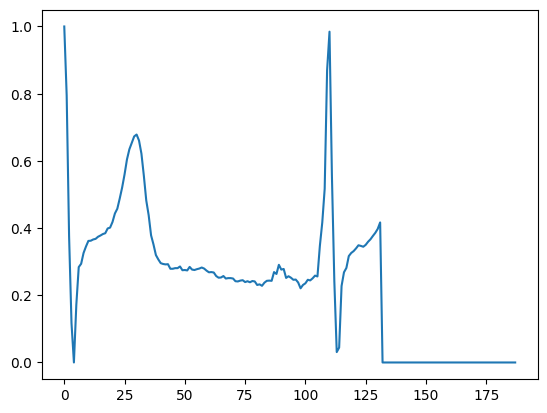

In [ ]:
plt.plot(data_no[0,:])

In [ ]:
nTrain = 3000
nTest = 1000
x_train = np.concatenate((data_no[:nTrain,:], data_ab[:nTrain,:]), 0)
y_train = np.concatenate((np.zeros(nTrain,), np.ones(nTrain,)),0)
x_test = np.concatenate((data_no[nTrain:nTrain+nTest,:], data_ab[nTrain:nTrain+nTest,:]), 0)
y_test = np.concatenate((np.zeros(nTest,), np.ones(nTest,)),0)

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
model = Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, input_shape=(x_train.shape[1],1), activation='relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, input_shape=(x_train.shape[1],1), activation='relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.LSTM(16))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 50, batch_size=128, validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 7s 100ms/step - loss: 0.6480 - accuracy: 0.6335 - val_loss: 0.9982 - val_accuracy: 0.3617
Epoch 2/50
38/38 [==============================] - 4s 103ms/step - loss: 0.5907 - accuracy: 0.7073 - val_loss: 0.8350 - val_accuracy: 0.5167
Epoch 3/50
38/38 [==============================] - 3s 70ms/step - loss: 0.5820 - accuracy: 0.7092 - val_loss: 0.8318 - val_accuracy: 0.4992
Epoch 4/50
38/38 [==============================] - 3s 68ms/step - loss: 0.5691 - accuracy: 0.7208 - val_loss: 1.0257 - val_accuracy: 0.3050
Epoch 5/50
38/38 [==============================] - 2s 66ms/step - loss: 0.5642 - accuracy: 0.7167 - val_loss: 0.9789 - val_accuracy: 0.4250
Epoch 6/50
38/38 [==============================] - 5s 134ms/step - loss: 0.5709 - accuracy: 0.7102 - val_loss: 0.8889 - val_accuracy: 0.3825
Epoch 7/50
38/38 [==============================] - 5s 129ms/step - loss: 0.5568 - accuracy: 0.7225 - val_loss: 0.8914 - val_accuracy: 0.4950
Epoch 8/5

In [ ]:
o = model.predict(x_test)
o = np.argmax(o,1)
y_test = np.argmax(y_test,1)
sum(np.equal(y_test,o))/len(y_test)

63/63 [==============================] - 2s 13ms/step


array([0.5045, 0.5045, 0.5045, ..., 0.5045, 0.5045, 0.5045])